# **Connexion avec** **Drive**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Chargement** **du** **Dataset** **depuis** **Inaturalist**

In [ ]:
import os
import requests
from tqdm import tqdm
import time

# Lien vers Google Drive monté
DATASET_DIR = "/content/drive/MyDrive/fish_dataset"
os.makedirs(DATASET_DIR, exist_ok=True)

API_URL = "https://api.inaturalist.org/v1/observations"
PARAMS = {
    "quality_grade": "research",
    "has[]": "photos",
    "per_page": 200,
}

# Liste des espèces (mets ici tes 200 espèces)
FISH_SPECIES = [
    "Lepomis macrochirus", "Micropterus nigricans", "Cyprinus carpio", "Oncorhynchus mykiss", "Cyprinus rubrofuscus", "Gambusia affinis", "Lepomis cyanellus", "Lepomis gibbosus", "Micropterus dolomieu", "Carassius auratus", "Semotilus atromaculatus", "Salvelinus fontinalis", "Ictalurus punctatus", "Zanclus cornutus", "Perca flavescens", "Abudefduf saxatilis", "Lepomis auritus", "Perca fluviatilis", "Ambloplites rupestris", "Pomoxis nigromaculatus", "Gasterosteus aculeatus", "Sarpa salpa", "Mugil cephalus", "Sphyraena barracuda", "Acanthurus coeruleus", "Oligocottus maculosus", "Thalassoma pavo", "Fistularia commersonii", "Pterois volitans", "Diodon hystrix", "Lagodon rhomboides", "Diplodus vulgaris", "Abudefduf vaigiensis", "Acanthurus triostegus", "Oreochromis niloticus", "Chaetodon auriga", "Clinocottus analis", "Catostomus commersonii", "Thalassoma bifasciatum", "Diodon holocanthus", "Oncorhynchus tshawytscha", "Diplodus sargus", "Sparisoma viride", "Squalius cephalus", "Lutjanus griseus", "Coris julis", "Arothron hispidus", "Dorosoma cepedianum", "Chromis chromis", "Serranus scriba", "Labroides dimidiatus", "Etheostoma caeruleum", "Amphiprion clarkii", "Lepomis aquilensis", "Abudefduf sexfasciatus", "Oncorhynchus kisutch", "Lepomis gulosus", "Haemulon flavolineatum", "Ameiurus nebulosus", "Lepisosteus osseus", "Lutjanus apodus", "Scardinius erythrophthalmus", "Thalassoma lunare", "Morone saxatilis", "Notemigonus crysoleucas", "Aulostomus chinensis", "Symphodus tinca", "Oreochromis mossambicus", "Oblada melanurus", "Mayaheros urophthalmus", "Rutilus rutilus", "Aplodinotus grunniens", "Micropterus salmoides", "Pomacanthus paru", "Poecilia reticulata", "Dascyllus trimaculatus", "Lepomis microlophus", "Epinephelus marginatus", "Paracirrhites forsteri", "Amphiprion ocellaris", "Scarus ghobban", "Ostracion meleagris", "Chilomycterus schoepfii", "Caranx melampygus", "Neogobius melanostomus", "Luxilus cornutus", "Ostracion cubicum", "Hippocampus abdominalis", "Fundulus heteroclitus", "Mullus surmuletus", "Etheostoma flabellare", "Arothron meleagris", "Chaetodon lunula", "Rhinichthys atratulus", "Pimephales notatus", "Chlorurus spilurus", "Lepisosteus platyrhincus", "Haemulon sciurus", "Chrysophrys auratus", "Enoplosus armatus", "Poecilia latipinna", "Ariopsis felis", "Mola mola", "Carassius gibelio", "Sander vitreus", "Gymnothorax javanicus", "Anguilla rostrata", "Sparisoma cretense", "Betta splendens", "Arothron nigropunctatus", "Halichoeres bivittatus", "Thalassoma hardwicke", "Campostoma anomalum", "Hypsypops rubicundus", "Ctenochaetus striatus", "Pimephales promelas", "Pterois miles", "Scarus rubroviolaceus", "Fundulus diaphanus", "Diodon nicthemerus", "Halichoeres hortulanus", "Phyllopteryx taeniolatus", "Sciaenops ocellatus", "Megalops atlanticus", "Ameiurus natalis", "Mulloidichthys flavolineatus", "Acanthurus tractus", "Gomphosus varius", "Naso unicornis", "Lepomis megalotis", "Lepisosteus oculatus", "Brevoortia tyrannus", "Balistoides viridescens", "Chaetodon lunulatus", "Tylosurus crocodilus", "Acanthurus nigrofuscus", "Rhinecanthus aculeatus", "Ophiodon elongatus", "Aluterus scriptus", "Ameiurus melas", "Abudefduf sordidus", "Cephalopholis argus", "Muraena helena", "Naso lituratus", "Lipophrys pholis", "Rhinichthys obtusus", "Zebrasoma flavescens", "Echidna nebulosa", "Chromis viridis", "Balistapus undulatus", "Aulostomus maculatus", "Scarus iseri", "Achoerodus viridis", "Chaetodon capistratus", "Zebrasoma velifer", "Ocyurus chrysurus", "Parupeneus multifasciatus", "Luxilus chrysocephalus", "Cyprinodon variegatus", "Pygoplites diacanthus", "Acanthopagrus australis", "Morone americana", "Tetractenos glaber", "Oncorhynchus nerka", "Fundulus notatus", "Monacanthus chinensis", "Channa striata", "Lactophrys triqueter", "Oncorhynchus keta", "Acanthurus lineatus", "Canthigaster valentini", "Archosargus probatocephalus", "Chaetodon vagabundus", "Scorpaena jacksoniensis", "Thalassoma lucasanum", "Culaea inconstans", "Pomacanthus imperator", "Gobius niger", "Esox niger", "Caranx ruber", "Strongylura marina", "Phycodurus eques", "Pomacentrus moluccensis", "Scolopsis bilineata", "Plotosus lineatus", "Oreochromis aureus", "Platax teira", "Acanthurus xanthopterus", "Pomoxis annularis", "Microspathodon chrysurus", "Abudefduf troschelii", "Hypentelium nigricans", "Morwong fuscus", "Cynoscion nebulosus", "Prionurus laticlavius", "Parablennius gattorugine", "Holacanthus passer"
    # Add more species here...
]

def chunk_species(species_list, chunk_size=10):
    for i in range(0, len(species_list), chunk_size):
        yield species_list[i:i + chunk_size]

all_chunks = list(chunk_species(FISH_SPECIES, chunk_size=10))
CHUNK_INDEX = 1  
# ⇦ change ça à 1, 2, etc. pour changer de lot
def download_images(species, max_images=1000):
    species_dir = os.path.join(DATASET_DIR, species.replace(" ", "_"))
    os.makedirs(species_dir, exist_ok=True)

    downloaded = 0
    page = 1

    with tqdm(total=max_images, desc=f"Téléchargement de {species}") as pbar:
        while downloaded < max_images:
            params = {**PARAMS, "taxon_name": species, "page": page}
            try:
                response = requests.get(API_URL, params=params).json()
            except Exception as e:
                print(f"Erreur API : {e}")
                break

            if not response.get("results"):
                break

            for obs in response["results"]:
                for photo in obs.get("photos", []):
                    try:
                        img_url = photo["url"].replace("square", "original")
                        img_data = requests.get(img_url).content

                        img_path = os.path.join(species_dir, f"{obs['id']}_{photo['id']}.jpg")
                        with open(img_path, "wb") as f:
                            f.write(img_data)

                        downloaded += 1
                        pbar.update(1)

                        if downloaded >= max_images:
                            return
                    except Exception as e:
                        print(f"Erreur img {img_url}: {e}")

            page += 1
            time.sleep(1)

# Téléchargement pour le lot actuel
current_species = all_chunks[CHUNK_INDEX]
for species in current_species:
    download_images(species, max_images=1000)

print(f"✅ Lot {CHUNK_INDEX + 1}/{len(all_chunks)} terminé. Stocké dans Google Drive.")


Téléchargement de Salvelinus fontinalis:   0%|          | 4/1000 [00:05<22:12,  1.34s/it]


KeyboardInterrupt: 

# **Exploitation Des Donnees**

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2
import random

# Dossier contenant les espèces : "/content/drive/MyDrive/fish_dataset/"
dataset_path = "/content/drive/MyDrive/fish_dataset"

# Initialisation des compteurs
species_count = {}
image_count = {}
examples = {}

# Récupération des espèces (chaque dossier = 1 espèce)
for species_folder in sorted(os.listdir(dataset_path)):
    species_path = os.path.join(dataset_path, species_folder)
    if not os.path.isdir(species_path):
        continue

    species_count[species_folder] = 0
    image_files = [f for f in os.listdir(species_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    image_count[species_folder] = len(image_files)
    species_count[species_folder] = len(image_files)

    # Prend quelques exemples aléatoires
    if image_files:
        sampled = random.sample(image_files, min(3, len(image_files)))
        examples[species_folder] = [os.path.join(species_path, f) for f in sampled]

# Tri par nombre d'images
sorted_species = dict(sorted(species_count.items(), key=lambda x: x[1], reverse=True))

# Affichage texte
print(f"📊 Nombre total d'espèces : {len(species_count)}")
print(f"🖼️ Nombre total d'images : {sum(species_count.values())}\n")
for species, count in sorted_species.items():
    print(f"{species:<25} : {count} images")

# Graphe de distribution
plt.figure(figsize=(12,6))
plt.bar(sorted_species.keys(), sorted_species.values(), color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Nombre d'images")
plt.title("Distribution des images par espèce")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Affichage de quelques exemples d'images
import matplotlib.pyplot as plt

for species, img_paths in examples.items():
    print(f"\n🧬 Exemples pour : {species}")
    plt.figure(figsize=(12, 3))
    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(img_paths), i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path), fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


# **Organisation Du Dataset**

In [ ]:
import os
import shutil

# Dossier source (où se trouvent les dossiers d'espèces)
original_dir = "/content/drive/MyDrive/fish_dataset"  # adapte si ton chemin est différent
output_base = "/content/drive/MyDrive/organized_fish_dataset"
output_level1 = os.path.join(output_base, "level1_families")
output_level2 = os.path.join(output_base, "level2_species")

# Mapping Espèce ➜ Famille
family_map = {
    "Abudefduf_saxatilis": "Abudefduf",
    "Ambloplites_rupestris": "Ambloplites",
    "Carassius_auratus": "Cyprinidae",
    "Cyprinus_carpio": "Cyprinidae",
    "Cyprinus_rubrofuscus": "Cyprinidae",
    "Esox_lucius": "Esox",
    "Gambusia_affinis": "Gambusia",
    "Gambusia_holbrooki": "Gambusia",
    "Ictalurus_punctatus": "Ictaluridae",
    "Lepomis_auritus": "Lepomis",
    "Lepomis_cyanellus": "Lepomis",
    "Lepomis_gibbosus": "Lepomis",
    "Lepomis_macrochirus": "Lepomis",
    "Micropterus_dolomieu": "Micropterus",
    "Micropterus_nigricans": "Micropterus",
    "Oncorhynchus_mykiss": "Salmonidae",
    "Perca_flavescens": "Perca",
    "Perca_fluviatilis": "Perca",
    "Pomoxis_nigromaculatus": "Pomoxis",
    "Salmo_trutta": "Salmonidae",
    "Salvelinus_fontinalis": "Salmonidae",
    "Semotilus_atromaculatus": "Cyprinidae",
    "Zanclus_cornutus": "Zanclidae",
}

# Créer un dossier s'il n'existe pas
def safe_mkdir(path):
    os.makedirs(path, exist_ok=True)

# Créer les dossiers racines
safe_mkdir(output_level1)
safe_mkdir(output_level2)

# Réorganisation des images
for species, family in family_map.items():
    species_dir = os.path.join(original_dir, species)
    if not os.path.isdir(species_dir):
        print(f"⛔ Dossier manquant : {species_dir}")
        continue

    # Dossier famille (Level 1)
    dst_family_dir = os.path.join(output_level1, family)
    safe_mkdir(dst_family_dir)

    # Dossier espèce dans la famille (Level 2)
    dst_species_dir = os.path.join(output_level2, family, species.split("_")[1].lower())
    safe_mkdir(dst_species_dir)

    # Copie des images dans les deux structures
    for img_file in os.listdir(species_dir):
        if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
            src_path = os.path.join(species_dir, img_file)

            # Level 1 : nommage avec l'espèce
            dst1 = os.path.join(dst_family_dir, f"{species}_{img_file}")
            shutil.copy2(src_path, dst1)

            # Level 2 : nommage original
            dst2 = os.path.join(dst_species_dir, img_file)
            shutil.copy2(src_path, dst2)

print("✅ Organisation terminée dans : /content/organized_fish_dataset")


✅ Organisation terminée dans : /content/organized_fish_dataset


# **Traitement des Images corrompu**

In [ ]:
import os
from PIL import Image, UnidentifiedImageError
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Set your dataset root folder
root_dir = '/content/drive/MyDrive/organized_fish_dataset/level1_families'  # Update this path

def is_image_damaged(path):
    try:
        with Image.open(path) as img:
            img.verify()  # Verify image integrity
            if img.size[0] == 0 or img.size[1] == 0:
                return True
        return False
    except (UnidentifiedImageError, OSError):
        return True

def clean_all_images(root_path, workers=8):
    print(f"Scanning folders in: {root_path}")
    image_paths = []

    for class_folder in os.listdir(root_path):
        class_path = os.path.join(root_path, class_folder)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    image_paths.append(os.path.join(class_path, fname))

    print(f"Total images found: {len(image_paths)}")

    removed = 0
    with ThreadPoolExecutor(max_workers=workers) as executor:
        for path, damaged in tqdm(zip(image_paths, executor.map(is_image_damaged, image_paths)), total=len(image_paths)):
            if damaged:
                os.remove(path)
                removed += 1

    print(f"✅ Cleaning complete. Damaged images removed: {removed}")

# Run the function
clean_all_images('/content/drive/MyDrive/organized_fish_dataset/level1_families')  # replace with your dataset path


Scanning folders in: /content/drive/MyDrive/organized_fish_dataset/level1_families
Total images found: 21082


100%|██████████| 21082/21082 [34:21<00:00, 10.23it/s]

✅ Cleaning complete. Damaged images removed: 1


# **Entrainement du Model**

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torch.backends import cudnn

# ✅ Optimisation GPU
cudnn.benchmark = True

# ✅ Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionne l'image à 224x224 pixels
    transforms.RandomHorizontalFlip(),  # Retourne horizontalement l'image aléatoirement
    transforms.RandomRotation(10),  # Applique une rotation aléatoire de ±10°
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Change  luminosité, contraste, saturation
    transforms.ToTensor(),  # Convertit l'image PIL en tenseur PyTorch (valeurs entre 0 et 1)
    transforms.Normalize([0.485, 0.456, 0.406],  # Normalise chaque canal (R, G, B) avec la moyenne d'ImageNet
                         [0.229, 0.224, 0.225])  # ... et l'écart-type d'ImageNet
])


# ✅ Dataset
data_dir = "/content/drive/MyDrive/organized_fish_dataset/level1_families"
full_dataset = datasets.ImageFolder(data_dir, transform=transform)

# ✅ Split train/val
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# ✅ Classes
class_names = full_dataset.classes

# ✅ Modèle
model = models.resnet50(pretrained=True)  # Charge le modèle ResNet-50 préentraîné sur ImageNet
num_ftrs = model.fc.in_features  # Nombre d'entrées de la couche fully connected finale
model.fc = nn.Linear(num_ftrs, len(class_names))  # Remplace la dernière couche pour s'adapter au nombre de classes

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Utilise GPU si dispo, sinon CPU
model = model.to(device)  # Déplace le modèle sur l'appareil choisi

# ✅ Loss & Optimizer
criterion = nn.CrossEntropyLoss()  # Fonction de perte pour classification multi-classes
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Optimiseur Adam avec un learning rate de 0.0001

# ✅ Entraînement + Validation Accuracy
epochs = 10  # Nombre d'époques d'entraînement
best_acc = 0.0  # Pour suivre la meilleure précision atteinte

for epoch in range(epochs):  # Boucle sur les époques
    model.train()  # Mode entraînement (active dropout, batchnorm, etc.)
    running_loss = 0.0  # Initialisation de la perte cumulée

    for inputs, labels in train_loader:  # Boucle sur les mini-batches du DataLoader
        inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)  
        optimizer.zero_grad()  # Réinitialise les gradients
        outputs = model(inputs)  # Passe avant (forward pass)
        loss = criterion(outputs, labels)  # Calcul de la perte
        loss.backward()  # Rétropropagation (calcul des gradients)
        optimizer.step()  # Mise à jour des poids du modèle
        running_loss += loss.item()  # Ajoute la perte de ce batch à la somme totale

    avg_loss = running_loss / len(train_loader)  # Calcule la perte moyenne pour cette époque


    # 🔍 Évaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"[{epoch+1}/{epochs}] Loss: {avg_loss:.4f} | Val Accuracy: {acc:.2f}%")

    # 💾 Sauvegarde du meilleur modèle
    if acc > best_acc:
        best_acc = acc
        save_path = "/content/drive/MyDrive/best_fish_model.pth"
        torch.save(model.state_dict(), save_path)
        print(f"✅ Meilleur modèle sauvegardé avec {best_acc:.2f}% dans : {save_path}")


# **Test Du Model**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# ✅ Device (CPU fallback if no GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Class names (from the image)
class_names = [
    "Abudefduf", "Ambloplites", "Cyprinidae", "Esox", "Gambusia",
    "Ictaluridae", "Lepomis", "Micropterus", "Perca", "Pomoxis", "Salmonidae"
]

# ✅ Load the trained model
model = models.resnet50(pretrained=False)
model.fc = nn.Linear(2048, len(class_names))
model.load_state_dict(torch.load("/content/best_fish_model.pth", map_location=device))
model.eval()
model.to(device)

# ✅ Transformation (MUST match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load and preprocess an image
image_path = "/content/drive/MyDrive/organized_fish_dataset/level1_families/Cyprinidae/Carassius_auratus_256979945_460888531.jpg"  # <-- change to your image path
img = Image.open(image_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)

# ✅ Predict
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted_class = class_names[predicted.item()]
    print(f"🎯 Predicted Fish Family: {predicted_class}")

🎯 Predicted Fish Family: Cyprinidae


# **2 eme Partie**

In [ ]:
import os

# Chemin vers le dossier contenant les familles
base_path = "/content/drive/MyDrive/organized_fish_dataset/level2_species"

total_images = 0

for family_name in sorted(os.listdir(base_path)):
    family_path = os.path.join(base_path, family_name)
    if not os.path.isdir(family_path):
        continue

    family_image_count = 0

    for species_name in os.listdir(family_path):
        species_path = os.path.join(family_path, species_name)
        if not os.path.isdir(species_path):
            continue

        image_count = sum(
            1 for fname in os.listdir(species_path)
            if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'))
        )

        family_image_count += image_count

    print(f"Famille '{family_name}': {family_image_count} images")
    total_images += family_image_count

print(f"\n🔢 Total général : {total_images} images")


Famille 'Abudefduf': 1000 images
Famille 'Ambloplites': 1000 images
Famille 'Cyprinidae': 3092 images
Famille 'Esox': 1000 images
Famille 'Gambusia': 2000 images
Famille 'Ictaluridae': 1000 images
Famille 'Lepomis': 4000 images
Famille 'Micropterus': 1993 images
Famille 'Perca': 2000 images
Famille 'Pomoxis': 1000 images
Famille 'Salmonidae': 2996 images

🔢 Total général : 21081 images


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm

# 🔧 Configurations
FAMILY_NAME = "Lepomis"
FAMILY_DIR = f"/content/drive/MyDrive/organized_fish_dataset/level2_species/{FAMILY_NAME}"
OUTPUT_MODEL_PATH = f"/content/drive/MyDrive/fish_models/level2/level2_{FAMILY_NAME}.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 16
EPOCHS = 5

# 🔁 Vérifie qu'il y a au moins 2 espèces
if len(os.listdir(FAMILY_DIR)) < 2:
    raise Exception(f"Pas assez d'espèces dans {FAMILY_NAME} pour entraîner un modèle.")

# 📐 Prétraitement des images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 📁 Dataset & DataLoader
dataset = datasets.ImageFolder(root=FAMILY_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# 🧠 Modèle : ResNet18 simple
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, len(dataset.classes))
model = model.to(DEVICE)

# 🎯 Fonction de perte et optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 🏋️‍♂️ Entraînement
model.train()  # Met le modèle en mode entraînement (active dropout, batchnorm, etc.)

for epoch in range(EPOCHS):  # Boucle sur le nombre total d'époques
    total_loss = 0  # Initialisation de la perte cumulée pour cette époque

    for imgs, labels in tqdm(dataloader, desc=f"[{FAMILY_NAME}] Epoch {epoch+1}/{EPOCHS}"):  
        # Parcourt les mini-batches d'images et labels avec une barre de progression

        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)  # Envoie les données sur le GPU ou CPU choisi
        optimizer.zero_grad()  # Réinitialise les gradients des paramètres avant la rétropropagation
        outputs = model(imgs)  # Passe avant : calcule les prédictions du modèle
        loss = criterion(outputs, labels)  # Calcule la perte entre prédictions et labels réels
        loss.backward()  # Rétropropagation : calcule les gradients
        optimizer.step()  # Met à jour les poids du modèle selon les gradients calculés
        total_loss += loss.item()  # Ajoute la perte de ce batch à la somme totale

    # Affiche la perte moyenne sur tous les batches de l'époque
    print(f"✅ Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss/len(dataloader):.4f}")

# 💾 Sauvegarde du modèle
os.makedirs(os.path.dirname(OUTPUT_MODEL_PATH), exist_ok=True)  # Crée le dossier de destination si besoin
torch.save(model.state_dict(), OUTPUT_MODEL_PATH)  # Sauvegarde uniquement les poids du modèle
print(f"📦 Modèle sauvegardé : {OUTPUT_MODEL_PATH}")  # Confirme la sauvegarde



[Lepomis] Epoch 1/5: 100%|██████████| 250/250 [22:28<00:00,  5.39s/it]


✅ Epoch 1/5 - Loss: 1.4215


[Lepomis] Epoch 2/5: 100%|██████████| 250/250 [22:06<00:00,  5.31s/it]


✅ Epoch 2/5 - Loss: 1.3654


[Lepomis] Epoch 3/5: 100%|██████████| 250/250 [22:15<00:00,  5.34s/it]


✅ Epoch 3/5 - Loss: 1.3456


[Lepomis] Epoch 4/5: 100%|██████████| 250/250 [22:09<00:00,  5.32s/it]


✅ Epoch 4/5 - Loss: 1.3269


[Lepomis] Epoch 5/5: 100%|██████████| 250/250 [22:10<00:00,  5.32s/it]

✅ Epoch 5/5 - Loss: 1.3004
📦 Modèle sauvegardé : /content/drive/MyDrive/fish_models/level2/level2_Lepomis.pth


In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# --- CONFIGURATION ---

# 📁 Chemins
LEVEL1_MODEL_PATH = "/content/best_fish_model.pth"
LEVEL2_MODELS_DIR = "/content/drive/MyDrive/fish_models/level2/"
LEVEL1_CLASSES = sorted(os.listdir("/content/drive/MyDrive/organized_fish_dataset/level1_families"))
LEVEL2_BASE_DIR = "/content/drive/MyDrive/organized_fish_dataset/level2_species"

# 🖼️ Image à prédire
IMAGE_PATH = "/content/drive/MyDrive/organized_fish_dataset/level1_families/Esox/Esox_lucius_257295430_461528621.jpg"

# 🖥️ Device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔁 Transforms
COMMON_TRANSFORM = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

LEVEL1_TRANSFORM = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 🔍 Fonctions utilitaires

def load_model(model_type, num_classes, model_path, pretrained=True):
    if model_type == "resnet50":
        model = models.resnet50(pretrained=pretrained)
    elif model_type == "resnet18":
        model = models.resnet18(weights=None)
    else:
        raise ValueError("Modèle inconnu")

    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model = model.to(DEVICE)
    model.eval()
    return model

def predict(model, img_tensor):
    img_tensor = img_tensor.unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.nn.functional.softmax(output, dim=1)
        conf, pred = torch.max(probs, dim=1)
    return pred.item(), conf.item()

# 🧠 Étape 1 - Prédiction niveau 1 (famille)
img = Image.open(IMAGE_PATH).convert("RGB")
img_level1 = LEVEL1_TRANSFORM(img)

# Chargement du modèle level1
level1_model = load_model("resnet50", len(LEVEL1_CLASSES), LEVEL1_MODEL_PATH, pretrained=True)
family_index, confidence_family = predict(level1_model, img_level1)
predicted_family = LEVEL1_CLASSES[family_index]
print(f"👪 Famille prédite : {predicted_family} ({confidence_family*100:.2f}%)")

# 📚 Vérifier s'il y a un modèle level2 pour cette famille
level2_model_path = os.path.join(LEVEL2_MODELS_DIR, f"level2_{predicted_family}.pth")
family_species_dir = os.path.join(LEVEL2_BASE_DIR, predicted_family)
species_classes = sorted(os.listdir(family_species_dir))

if os.path.exists(level2_model_path) and len(species_classes) >= 2:
    # 🔁 Étape 2 - Utiliser modèle level2
    img_level2 = COMMON_TRANSFORM(img)
    level2_model = load_model("resnet18", len(species_classes), level2_model_path, pretrained=False)
    species_index, confidence_species = predict(level2_model, img_level2)
    predicted_species = species_classes[species_index]
    print(f"🧬 Espèce prédite : {predicted_species} ({confidence_species*100:.2f}%)")
else:
    # ✅ Famille avec une seule espèce
    predicted_species = species_classes[0]
    print(f"✅ Famille avec une seule espèce. Résultat : {predicted_species}")


👪 Famille prédite : Esox (98.93%)
✅ Famille avec une seule espèce. Résultat : lucius


In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import cv2

# --- CONFIGURATION ---

LEVEL1_MODEL_PATH = "/content/best_fish_model.pth"
LEVEL2_MODELS_DIR = "/content/drive/MyDrive/fish_models/level2/"
LEVEL1_CLASSES = sorted(os.listdir("/content/drive/MyDrive/organized_fish_dataset/level1_families"))
LEVEL2_BASE_DIR = "/content/drive/MyDrive/organized_fish_dataset/level2_species"

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

COMMON_TRANSFORM = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

LEVEL1_TRANSFORM = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- MODEL LOADING ---

def load_model(model_type, num_classes, model_path, pretrained=True):
    if model_type == "resnet50":
        model = models.resnet50(pretrained=pretrained)
    elif model_type == "resnet18":
        model = models.resnet18(weights=None)
    else:
        raise ValueError("Unknown model type")

    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model = model.to(DEVICE)
    model.eval()
    return model

# --- PREDICTION FUNCTION ---

def predict(model, img_tensor):
    img_tensor = img_tensor.unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.nn.functional.softmax(output, dim=1)
        conf, pred = torch.max(probs, dim=1)
    return pred.item(), conf.item()

# --- REAL-TIME PREDICTION FUNCTION ---

def predict_fish_species(image_path):
    img = Image.open(image_path).convert("RGB")
    img_level1 = LEVEL1_TRANSFORM(img)

    family_index, conf_family = predict(level1_model, img_level1)
    predicted_family = LEVEL1_CLASSES[family_index]
    print(f"👪 Famille prédite : {predicted_family} ({conf_family*100:.2f}%)")

    level2_model_path = os.path.join(LEVEL2_MODELS_DIR, f"level2_{predicted_family}.pth")
    family_species_dir = os.path.join(LEVEL2_BASE_DIR, predicted_family)
    species_classes = sorted(os.listdir(family_species_dir))

    if os.path.exists(level2_model_path) and len(species_classes) >= 2:
        img_level2 = COMMON_TRANSFORM(img)
        level2_model = load_model("resnet18", len(species_classes), level2_model_path, pretrained=False)
        species_index, conf_species = predict(level2_model, img_level2)
        predicted_species = species_classes[species_index]
        print(f"🧬 Espèce prédite : {predicted_species} ({conf_species*100:.2f}%)")
    else:
        predicted_species = species_classes[0]
        print(f"✅ Famille avec une seule espèce. Résultat : {predicted_species}")

# --- LOAD LEVEL1 MODEL ONCE ---
level1_model = load_model("resnet50", len(LEVEL1_CLASSES), LEVEL1_MODEL_PATH, pretrained=True)

# --- LIVE CAMERA PREDICTION (OPTIONAL) ---
def run_live_prediction():
    cap = cv2.VideoCapture(0)
    print("📸 Caméra en direct - Appuyez sur 'q' pour quitter.")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame temporarily
        temp_img_path = "temp_frame.jpg"
        cv2.imwrite(temp_img_path, frame)

        # Predict
        predict_fish_species(temp_img_path)

        # Show frame
        cv2.imshow("Fish Classifier", frame)

        if cv2.waitKey(5000) & 0xFF == ord('q'):  # 5 seconds delay between predictions
            break

    cap.release()
    cv2.destroyAllWindows()

# --- RUN ---
# For a single image:
predict_fish_species("images (1).jpg")


In [ ]:
import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)


Torch: 2.6.0+cu124
Torchvision: 0.21.0+cu124


c:\Users\ADAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ADAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


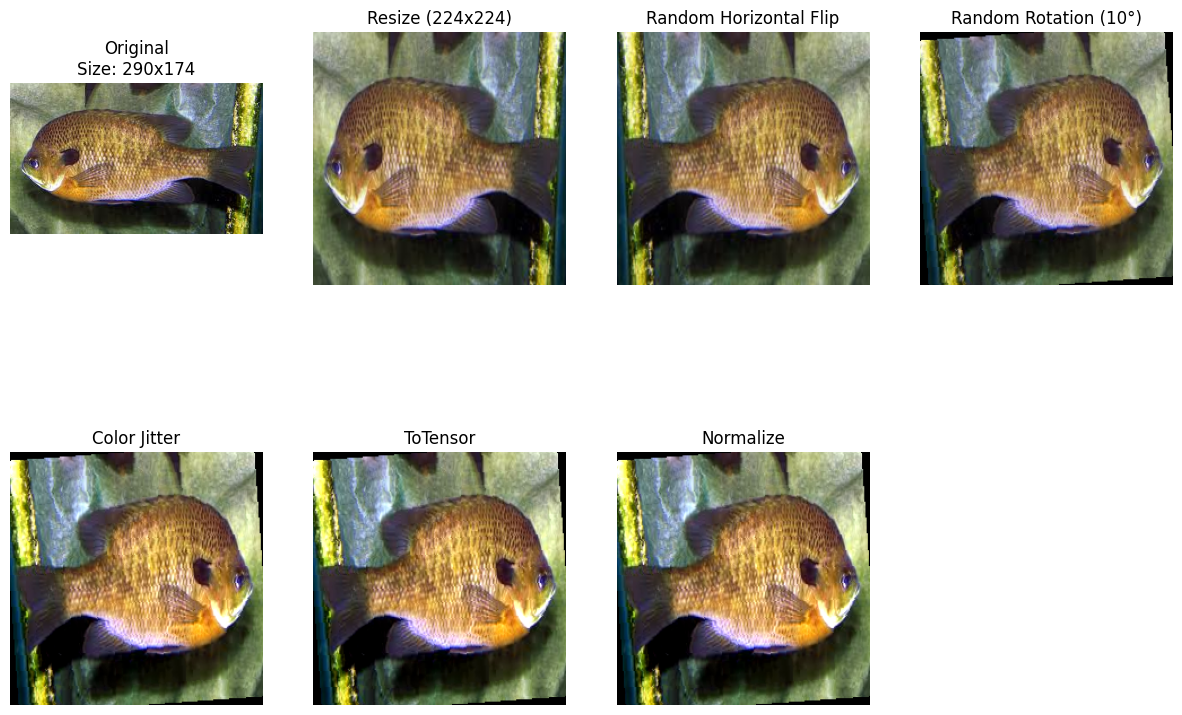

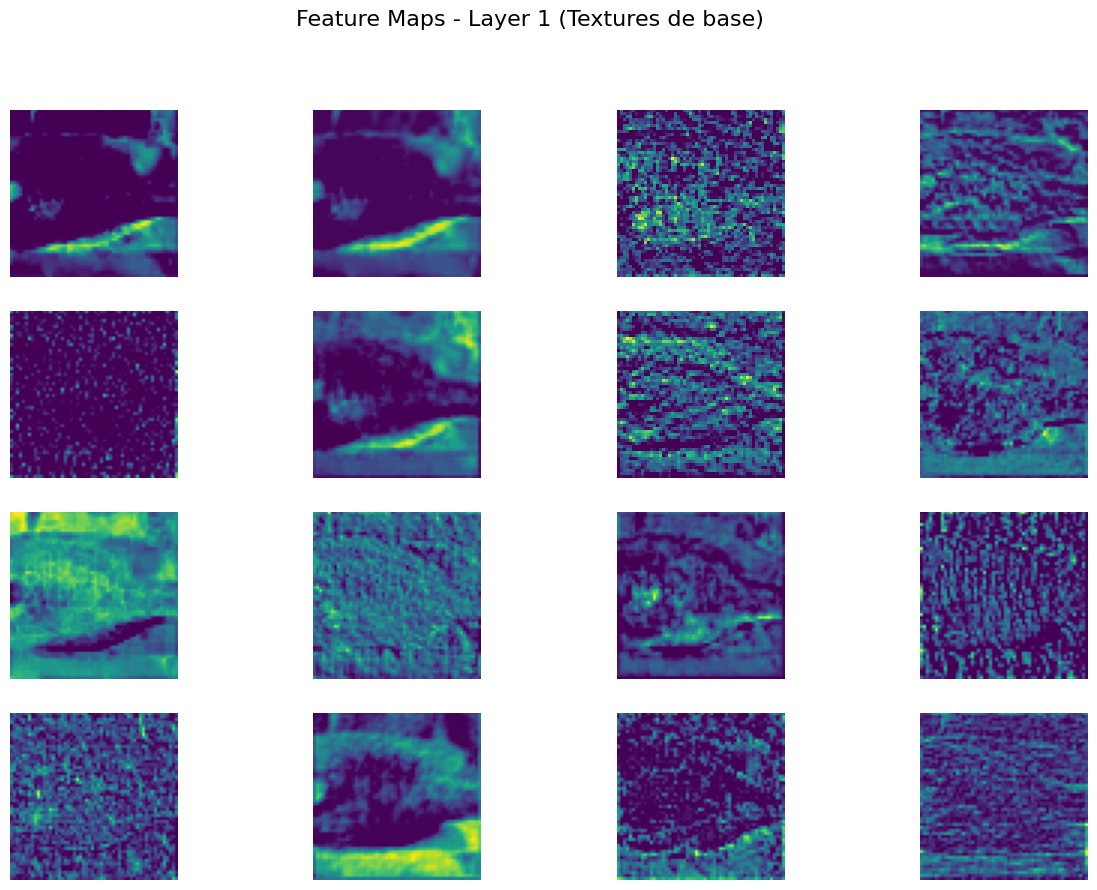

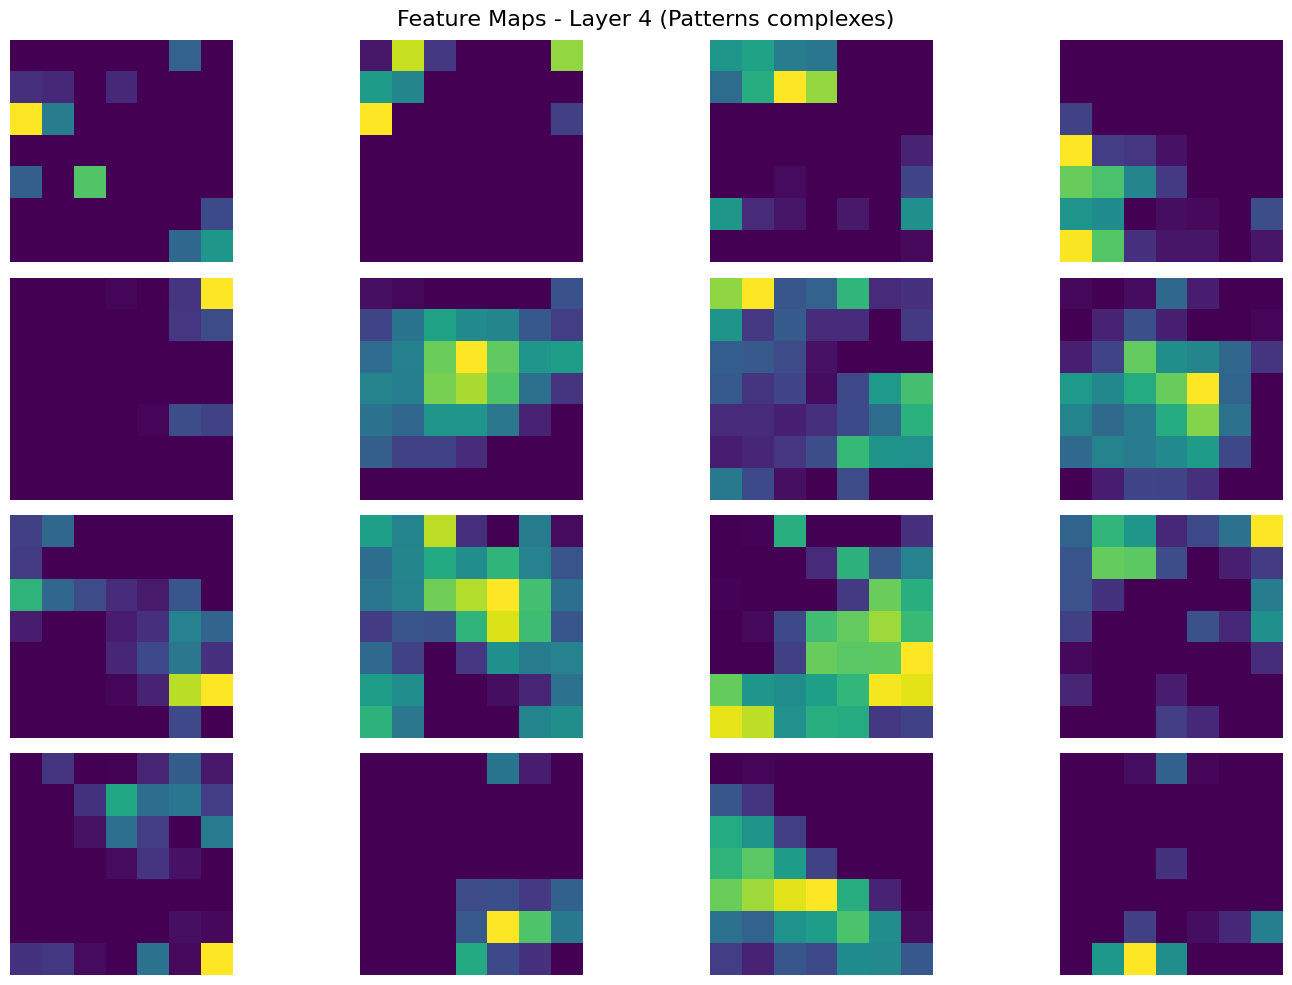

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, models
from PIL import Image

# Charger une image exemple
image_path = "images (1).jpeg"
original_image = Image.open(image_path)

# 1. Visualiser l'image originale
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(original_image)
plt.title("Original\nSize: {}x{}".format(original_image.size[0], original_image.size[1]))
plt.axis('off')

# 2. Définir les transformations
transform_steps = [
    ("Resize (224x224)", transforms.Resize((224, 224))),
    ("Random Horizontal Flip", transforms.RandomHorizontalFlip(p=1)),
    ("Random Rotation (10°)", transforms.RandomRotation(10)),
    ("Color Jitter", transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2)),
    ("ToTensor", transforms.ToTensor()),
    ("Normalize", transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]))
]

# 3. Appliquer et visualiser chaque étape
current_img = original_image
for i, (name, transform) in enumerate(transform_steps, 2):
    transformed_img = transform(current_img)
    
    # Convertir pour visualisation
    if isinstance(transformed_img, torch.Tensor):
        if name == "Normalize":
            # Dénormaliser pour l'affichage
            img = transformed_img.numpy().transpose((1, 2, 0))
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img = np.clip(img, 0, 1)
        else:
            img = transformed_img.numpy().transpose((1, 2, 0))
    else:
        img = np.array(transformed_img) / 255.0
    
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
    current_img = transformed_img  # Ne pas réinitialiser à original_image !

# 4. Visualiser les feature maps (couches CNN)
model = models.resnet50(pretrained=True)
model.eval()

# Hook pour capturer les feature maps
features = {}
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

model.layer1.register_forward_hook(get_features('layer1'))
model.layer4.register_forward_hook(get_features('layer4'))

# Prétraiter l'image pour le modèle (nouvelle transformation indépendante)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(original_image).unsqueeze(0)

# Forward pass
with torch.no_grad():
    output = model(input_tensor)

# Visualiser les feature maps
def show_feature_maps(feature_maps, title):
    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=16)
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(feature_maps[0, i].cpu().numpy(), cmap='viridis')
        plt.axis('off')

show_feature_maps(features['layer1'], "Feature Maps - Layer 1 (Textures de base)")
show_feature_maps(features['layer4'], "Feature Maps - Layer 4 (Patterns complexes)")

plt.tight_layout()
plt.show()